In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Importing the dataset
df = pd.read_csv('e_commerce_data.csv', encoding='cp1252')

In [3]:
# Understanding the data and structure
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.shape

(541909, 8)

In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
# Checking the data types
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [7]:
# Identifying the null values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
df[df.CustomerID.isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/2011 10:26,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/2011 10:26,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,12/9/2011 10:26,10.79,NaN,United Kingdom


## Handling the null values

In [9]:
# Dropping the Unnecessary column
df.drop('CustomerID', axis = 1, inplace = True)

In [10]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,United Kingdom


In [11]:
df[df.Description.isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.0,United Kingdom
1970,536545,21134,NaN,1,12/1/2010 14:32,0.0,United Kingdom
1971,536546,22145,NaN,1,12/1/2010 14:33,0.0,United Kingdom
1972,536547,37509,NaN,1,12/1/2010 14:33,0.0,United Kingdom
1987,536549,85226A,NaN,1,12/1/2010 14:34,0.0,United Kingdom
...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,12/7/2011 18:26,0.0,United Kingdom
535326,581203,23406,NaN,15,12/7/2011 18:31,0.0,United Kingdom
535332,581209,21620,NaN,6,12/7/2011 18:35,0.0,United Kingdom
536981,581234,72817,NaN,27,12/8/2011 10:33,0.0,United Kingdom


In [12]:
df[df.StockCode == '22139']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
106,536381,22139,RETROSPOT TEA SET CERAMIC 11 PC,23,12/1/2010 9:41,4.25,United Kingdom
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,United Kingdom
6392,536942,22139,amazon,15,12/3/2010 12:08,0.00,United Kingdom
6885,536982,22139,RETROSPOT TEA SET CERAMIC 11 PC,10,12/3/2010 14:27,11.02,United Kingdom
7203,537011,22139,NaN,-5,12/3/2010 15:38,0.00,United Kingdom
...,...,...,...,...,...,...,...
538411,581405,22139,RETROSPOT TEA SET CERAMIC 11 PC,1,12/8/2011 13:50,4.95,United Kingdom
539531,581439,22139,RETROSPOT TEA SET CERAMIC 11 PC,1,12/8/2011 16:30,10.79,United Kingdom
540441,581486,22139,RETROSPOT TEA SET CERAMIC 11 PC,6,12/9/2011 9:38,4.95,United Kingdom
541387,581498,22139,RETROSPOT TEA SET CERAMIC 11 PC,2,12/9/2011 10:26,10.79,United Kingdom


In [13]:
# creating a unique series mapping with stockcode as keys and description as values
mapping = df.dropna(subset = ['Description']).drop_duplicates('StockCode').set_index("StockCode")['Description']

In [14]:
mapping

StockCode
85123A     WHITE HANGING HEART T-LIGHT HOLDER
71053                     WHITE METAL LANTERN
84406B         CREAM CUPID HEARTS COAT HANGER
84029G    KNITTED UNION FLAG HOT WATER BOTTLE
84029E         RED WOOLLY HOTTIE WHITE HEART.
                         ...                 
85179a                GREEN BITTY LIGHT CHAIN
23617     SET 10 CARDS SWIRLY XMAS TREE 17104
90214U              LETTER "U" BLING KEY RING
47591b               SCOTTIES CHILDRENS APRON
23843             PAPER CRAFT , LITTLE BIRDIE
Name: Description, Length: 3958, dtype: object

In [15]:
# Imputing the null values in description column with mapped values
df.Description = df.Description.fillna(df.StockCode.map(mapping))

In [16]:
df.isnull().sum()

InvoiceNo        0
StockCode        0
Description    112
Quantity         0
InvoiceDate      0
UnitPrice        0
Country          0
dtype: int64

In [17]:
# cross verifying if the rows with null description can be imputed or have to be dropped
df[df.Description.isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
1970,536545,21134,NaN,1,12/1/2010 14:32,0.0,United Kingdom
1987,536549,85226A,NaN,1,12/1/2010 14:34,0.0,United Kingdom
1988,536550,85044,NaN,1,12/1/2010 14:34,0.0,United Kingdom
2024,536552,20950,NaN,1,12/1/2010 14:34,0.0,United Kingdom
2026,536554,84670,NaN,23,12/1/2010 14:35,0.0,United Kingdom
...,...,...,...,...,...,...,...
280754,561498,21610,NaN,-14,7/27/2011 14:10,0.0,United Kingdom
281615,561555,37477B,NaN,-11,7/28/2011 10:21,0.0,United Kingdom
281616,561557,37477C,NaN,-31,7/28/2011 10:21,0.0,United Kingdom
346849,567207,35592T,NaN,4,9/19/2011 11:01,0.0,United Kingdom


The price is zero for all the 112 rows

In [18]:
invoice_nan = df[df.Description.isnull()]['InvoiceNo']

In [19]:
invoice_nan

1970      536545
1987      536549
1988      536550
2024      536552
2026      536554
           ...  
280754    561498
281615    561555
281616    561557
346849    567207
497301    578360
Name: InvoiceNo, Length: 112, dtype: object

In [20]:
df[df.InvoiceNo.isin(invoice_nan)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
1970,536545,21134,NaN,1,12/1/2010 14:32,0.0,United Kingdom
1987,536549,85226A,NaN,1,12/1/2010 14:34,0.0,United Kingdom
1988,536550,85044,NaN,1,12/1/2010 14:34,0.0,United Kingdom
2024,536552,20950,NaN,1,12/1/2010 14:34,0.0,United Kingdom
2026,536554,84670,NaN,23,12/1/2010 14:35,0.0,United Kingdom
...,...,...,...,...,...,...,...
280754,561498,21610,NaN,-14,7/27/2011 14:10,0.0,United Kingdom
281615,561555,37477B,NaN,-11,7/28/2011 10:21,0.0,United Kingdom
281616,561557,37477C,NaN,-31,7/28/2011 10:21,0.0,United Kingdom
346849,567207,35592T,NaN,4,9/19/2011 11:01,0.0,United Kingdom


In [21]:
# It has exactly same rows as the missing description values. Also the Unitprice is zero.
# So, dropping the rows that do not contribute to analysis
df.dropna(inplace = True)

In [22]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
Country        0
dtype: int64

In [23]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
Country         object
dtype: object

In [24]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,United Kingdom


In [25]:
print(df.InvoiceNo.map(type).unique())

[<class 'str'>]


In [26]:
# df['InvoiceNo'] = df.InvoiceNo.astype('Int64')

In [27]:
alphanumeric_invoice_ids = df.loc[df["InvoiceNo"].str.contains(r'[A-Za-z]'), "InvoiceNo"]
print(alphanumeric_invoice_ids)


141       C536379
154       C536383
235       C536391
236       C536391
237       C536391
           ...   
540449    C581490
541541    C581499
541715    C581568
541716    C581569
541717    C581569
Name: InvoiceNo, Length: 9291, dtype: object


In [28]:
# Updating the data types of columns
df.InvoiceNo = df.InvoiceNo.astype('string')
df.StockCode = df.StockCode.astype('string')
df.Description = df.Description.astype('string')
df.InvoiceDate = df.InvoiceDate.astype('str')
df.InvoiceDate = pd.to_datetime(df.InvoiceDate, errors = 'coerce')
df.Country = df.Country.astype('string')

In [29]:
df.dtypes

InvoiceNo      string[python]
StockCode      string[python]
Description    string[python]
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
Country        string[python]
dtype: object

In [30]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom


In [31]:
df.Description = df.Description.str.strip().str.lower()

#### Q1. Monthly sales and trend Q2. Sales by country Q3. Top 10 products by sales overall Q4. Top 3 products by sales by country

#### Overall Monthly Revenue trend

In [32]:
# Q1 Monthly sales overall
df['total_price'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,total_price
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,United Kingdom,15.30
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,United Kingdom,22.00
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34


In [33]:
print(min(df.InvoiceDate), max(df.InvoiceDate))

2010-12-01 08:26:00 2011-12-09 12:50:00


So, we have data from 01 Dec, 2010 to 09 Dec 2011. 

In [34]:
df['month'] = df['InvoiceDate'].dt.to_period('M')

In [35]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,total_price,month
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,United Kingdom,15.30,2010-12
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010-12
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,United Kingdom,22.00,2010-12
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010-12
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010-12


In [36]:
monthly_revenue = df.groupby('month')['total_price'].sum().reset_index()
monthly_revenue

,month,total_price
0,2010-12,748957.020
1,2011-01,560000.260
2,2011-02,498062.650
3,2011-03,683267.080
4,2011-04,493207.121
5,2011-05,723333.510
6,2011-06,691123.120
7,2011-07,681300.111
8,2011-08,682680.510
9,2011-09,1019687.622


In [37]:
monthly_revenue['month']

0     2010-12
1     2011-01
2     2011-02
3     2011-03
4     2011-04
5     2011-05
6     2011-06
7     2011-07
8     2011-08
9     2011-09
10    2011-10
11    2011-11
12    2011-12
Name: month, dtype: period[M]

In [38]:
temp = ['Dec_2010', 'Jan_2011', 'Feb_2011', 'Mar_2011', 'Apr_2011', 'May_2011', 'Jun_2011', 'Jul_2011', 'Aug_2011', 'Sep_2011', 'Oct_2011', 'Nov_2011', 'Dec_2011']

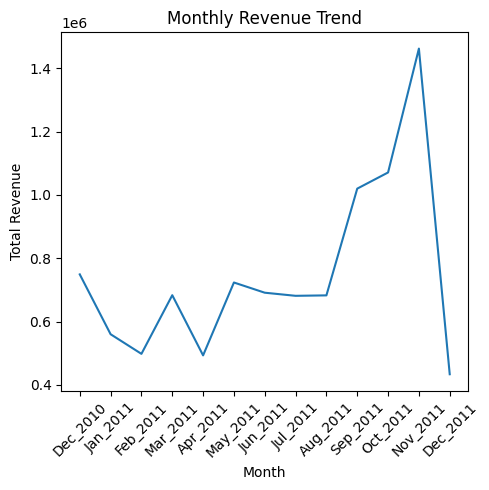

In [39]:
# Plotting the revenue per month
plt.figure(figsize=(5, 5))
plt.plot(temp, monthly_revenue['total_price'])
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title('Monthly Revenue Trend')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Top 10 countries by revenue

In [40]:
# Q2 Sales by country
country_revenue = df.groupby('Country')['total_price'].sum().reset_index()
country_revenue.rename(columns = {'total_price':'Revenue'}, inplace = True)
country_revenue = country_revenue.sort_values('Revenue', ascending = False)
country_revenue_top_10 = country_revenue.iloc[0:10, ]
country_revenue_top_10

,Country,Revenue
36,United Kingdom,8187806.364
24,Netherlands,284661.540
10,EIRE,263276.820
14,Germany,221698.210
13,France,197403.900
0,Australia,137077.270
33,Switzerland,56385.350
31,Spain,54774.580
3,Belgium,40910.960
32,Sweden,36595.910


In [41]:
df.Country.unique()

<StringArray>
[      'United Kingdom',               'France',            'Australia',
          'Netherlands',              'Germany',               'Norway',
                 'EIRE',          'Switzerland',                'Spain',
               'Poland',             'Portugal',                'Italy',
              'Belgium',            'Lithuania',                'Japan',
              'Iceland',      'Channel Islands',              'Denmark',
               'Cyprus',               'Sweden',              'Austria',
               'Israel',              'Finland',              'Bahrain',
               'Greece',            'Hong Kong',            'Singapore',
              'Lebanon', 'United Arab Emirates',         'Saudi Arabia',
       'Czech Republic',               'Canada',          'Unspecified',
               'Brazil',                  'USA',   'European Community',
                'Malta',                  'RSA']
Length: 38, dtype: string

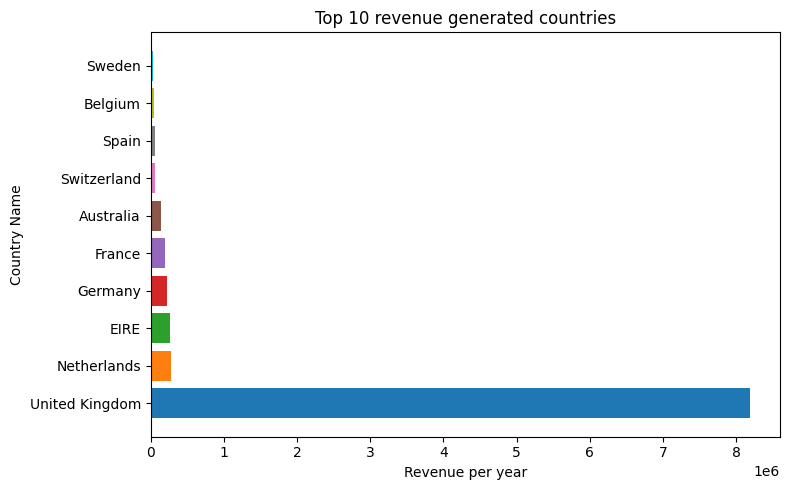

In [42]:
# Plotting top 10 revenue generated countries
colors = plt.cm.tab10.colors
num_bars = len(country_revenue_top_10)
plt.figure(figsize = (8,5))
plt.barh(country_revenue_top_10['Country'], country_revenue_top_10['Revenue'], color = colors[:num_bars])
plt.xlabel('Revenue per year')
plt.ylabel('Country Name')
plt.title('Top 10 revenue generated countries')
plt.tight_layout()
plt.show()

### Top 10 products by sales overall

In [43]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,total_price,month
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,United Kingdom,15.30,2010-12
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010-12
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,United Kingdom,22.00,2010-12
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010-12
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010-12


In [44]:
df.StockCode.nunique()

3958

In [45]:
unique_descriptions = df.Description.unique().tolist()

In [46]:
len(unique_descriptions)

4194

In [47]:
top_10_stockcode_by_sales = df.groupby('StockCode')['total_price'].sum().sort_values(ascending = False).reset_index().iloc[:10, ]

In [48]:
top_10_stockcode_by_sales

,StockCode,total_price
0,DOT,206245.48
1,22423,164762.19
2,47566,98302.98
3,85123A,97894.50
4,85099B,92356.03
5,23084,66756.59
6,POST,66230.64
7,22086,63791.94
8,84879,58959.73
9,79321,53768.06


In [49]:
top_10_products_by_sales = pd.merge(top_10_stockcode_by_sales, df[['StockCode', 'Description']], how = 'left', on = 'StockCode').drop_duplicates(subset = ['StockCode'])

In [50]:
top_10_products_by_sales

,StockCode,total_price,Description
0,DOT,206245.48,dotcom postage
710,22423,164762.19,regency cakestand 3 tier
2913,47566,98302.98,party bunting
4640,85123A,97894.50,white hanging heart t-light holder
6953,85099B,92356.03,jumbo bag red retrospot
9112,23084,66756.59,rabbit night light
10179,POST,66230.64,postage
11435,22086,63791.94,paper chain kit 50's christmas
12645,84879,58959.73,assorted colour bird ornament
14147,79321,53768.06,chilli lights


### Top 3 products by sales by country

In [54]:
top_stockcodes_by_sales_country = df.groupby(['Country', 'StockCode'], as_index = False)['total_price'].sum().sort_values(['Country', 'total_price'], ascending = [True, False]).groupby('Country').head(1)

In [55]:
top_stockcodes_by_sales_country

,Country,StockCode,total_price
397,Australia,23084,3375.84
906,Austria,POST,1456.00
914,Bahrain,23076,120.00
1700,Belgium,POST,4248.00
1713,Brazil,22423,175.20
1879,Canada,POST,550.94
2031,Channel Islands,22423,517.80
2582,Cyprus,22827,580.00
2819,Czech Republic,22326,70.80
2939,Denmark,22625,734.40


In [56]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,total_price,month
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,United Kingdom,15.30,2010-12
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010-12
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,United Kingdom,22.00,2010-12
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010-12
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010-12


In [57]:
df.shape

(541797, 9)

#### Embedding using sentence transformer

In [64]:
from sentence_transformers import SentenceTransformer

d:\github\e_commerce\e_commerce\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [65]:
# Creating the base model light weight and free
model = SentenceTransformer('all-MiniLM-L6-v2')

d:\github\e_commerce\e_commerce\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\revan\.cache\huggingface\hub\models--sentence-transformers--all-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to r

In [66]:
# Generating the embeddings
embeddings = model.encode(unique_descriptions, show_progress_bar = True)

Batches: 100%|██████████| 132/132 [00:08<00:00, 14.84it/s]


#### Creating the clusters using kmeans based on the embeddings created

In [67]:
from sklearn.cluster import KMeans

In [68]:
num_clusters = 15

In [69]:
kmeans = KMeans(n_clusters = num_clusters, random_state= 43)
clusters = kmeans.fit_predict(embeddings)

In [71]:
desc_cluster_df = pd.DataFrame({
    'Description': unique_descriptions,
    'Cluster': clusters
})

In [72]:
desc_cluster_df

,Description,Cluster
0,white hanging heart t-light holder,9
1,white metal lantern,12
2,cream cupid hearts coat hanger,9
3,knitted union flag hot water bottle,7
4,red woolly hottie white heart.,9
...,...,...
4189,????damages????,2
4190,mixed up,2
4191,lost,2
4192,cream hanging heart t-light holder,12


In [73]:
desc_cluster_df.sort_values('Cluster')

,Description,Cluster
29,panda and bunnies sticker sheet,0
2225,house shape pencil sharpener,0
2267,buttons and stripes notebook,0
2257,country cottage doorstop green,0
719,polkadot pen,0
...,...,...
1131,ring of roses birthday card,14
4131,set 10 cards 3 wise men 17107,14
4136,paisley park card,14
4142,set 10 cards deck the halls 16960,14


In [77]:
desc_cluster_df.loc[desc_cluster_df['Cluster'] == 3]

,Description,Cluster
9,assorted colour bird ornament,3
10,poppy's playhouse bedroom,3
98,felt egg cosy white rabbit,3
106,blue owl soft toy,3
129,white lovebird lantern,3
...,...,...
4065,traditional naughts & crosses,3
4134,white christmas tree 60cm,3
4143,12 hanging eggs hand painted,3
4161,hand painted hanging easter egg,3


In [78]:
df = df.merge(desc_cluster_df, on = 'Description', how = 'left')

In [79]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,total_price,month,Cluster
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,United Kingdom,15.30,2010-12,9
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010-12,12
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,United Kingdom,22.00,2010-12,9
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010-12,7
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010-12,9


In [104]:
inertia = []
k_range = range(10, 130, 5) 

In [97]:
k_range

range(25, 70, 5)

In [105]:
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(embeddings)
    inertia.append(km.inertia_)

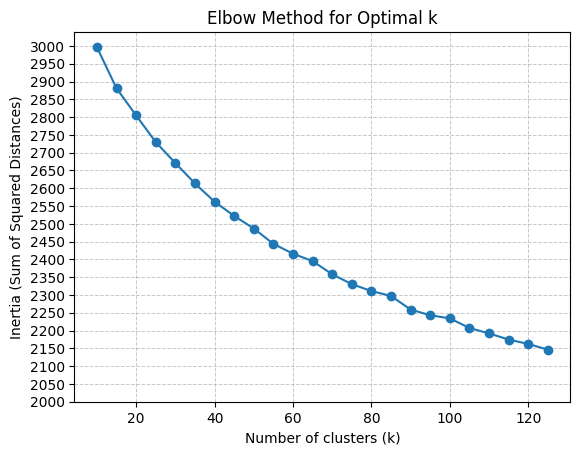

In [108]:
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.yticks(range(3000, 1999, -50))
plt.title('Elbow Method for Optimal k')
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
plt.show()

In [109]:
from sklearn.metrics import silhouette_score

In [110]:
sil_scores = []

In [111]:
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=43, n_init=10)
    labels = kmeans.fit_predict(embeddings)
    sil = silhouette_score(embeddings, labels)
    sil_scores.append(sil)
    print(f"k={k}, silhouette score={sil:.4f}")

k=10, silhouette score=0.0296
k=15, silhouette score=0.0409
k=20, silhouette score=0.0480
k=25, silhouette score=0.0468
k=30, silhouette score=0.0519
k=35, silhouette score=0.0560
k=40, silhouette score=0.0575
k=45, silhouette score=0.0591
k=50, silhouette score=0.0646
k=55, silhouette score=0.0650
k=60, silhouette score=0.0661
k=65, silhouette score=0.0709
k=70, silhouette score=0.0699
k=75, silhouette score=0.0697
k=80, silhouette score=0.0729
k=85, silhouette score=0.0754
k=90, silhouette score=0.0717
k=95, silhouette score=0.0747
k=100, silhouette score=0.0755
k=105, silhouette score=0.0756
k=110, silhouette score=0.0750
k=115, silhouette score=0.0795
k=120, silhouette score=0.0782
k=125, silhouette score=0.0795
